# I. Introduction and Load DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

import lime
import lime.lime_tabular

from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#smote - Tạo thêm dữ liệu để cân bằng 
from imblearn.over_sampling import SMOTE

## Some describe of dataset
The data is related with direct marketing campaigns of a Portuguese banking 

institution. The marketing campaigns were based on phone calls. Often, 

more than one contact to the same client was required, in order to access if the 

product (bank term deposit) would be ('yes') or not ('no') subscribed.

Age : Age of customer

Job : Job of customer

Martial : Martial status of customer

Education : Customer education level

Default : Has credit in default?

Housing : If costumer has housing loan

Loan: Has Personal Loan

Balance : Customer's individual balance

Contact : Communication type

Month : Last contact month of year

Day : Last contact day of the week

Duration: Last contact duration, in seconds

Campaign: Number of contacts performed during this campaign and for this client

Pdays: Number of days that passed by after the client was last contacted from a 
previous campaign

Previous: Number of contacts performed before this campaign and for this client

Poutcome: outcome of the previous marketing campaign

Y: has the client subscribed a term deposit

In [2]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\bank-full.csv')

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [7]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [8]:
#We need to change some columns to the right type
df['age'] = df['age'].astype(int)

In [9]:
#Drop some unnecessary columns :


# II. Data understanding & Data Preparation

In [10]:
#Let see the na values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
#Check the duplicate
df.duplicated().sum()

0

# III. Exploratory data analyst

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3.1.Target feature

Text(0.5, 1.0, 'Status target')

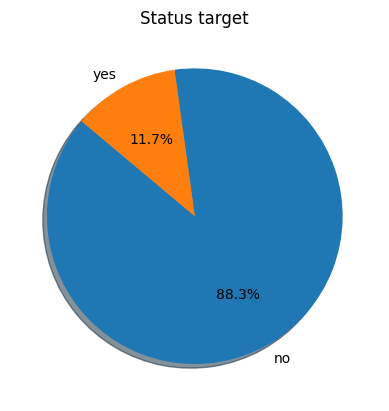

In [13]:
df_target = df.groupby('y').size().reset_index(name = 'count')
df_target['percent'] = (100*df_target['count']/ len(df)).round(2)
plt.pie(df_target['percent'], labels = df_target['y'], autopct = '%1.1f%%', shadow = True
       ,startangle = 140)
plt.title('Status target')

In [14]:
#Imbalance case

## 3.2.Numerical Feature

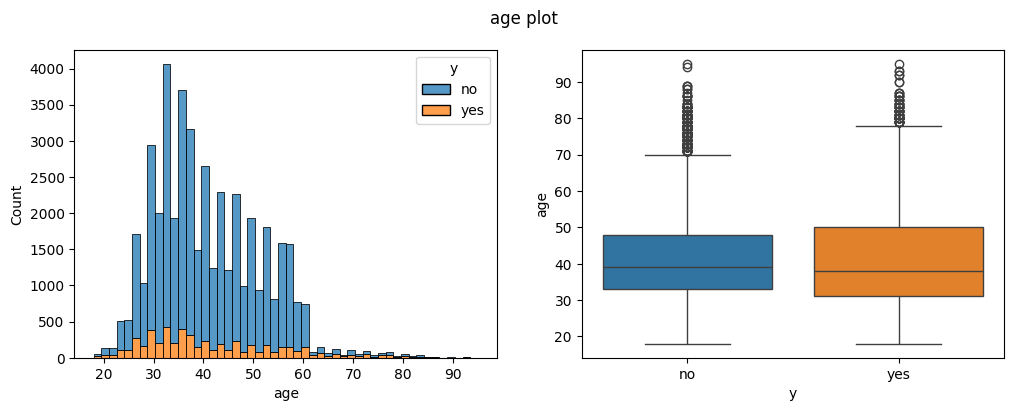

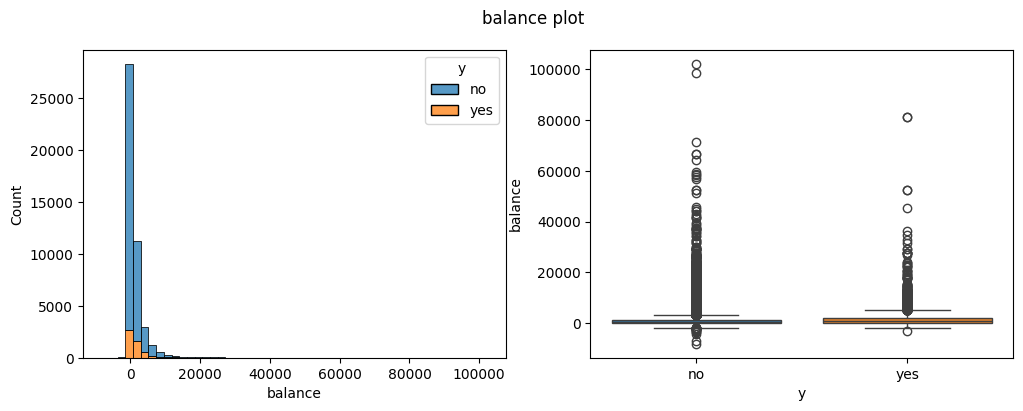

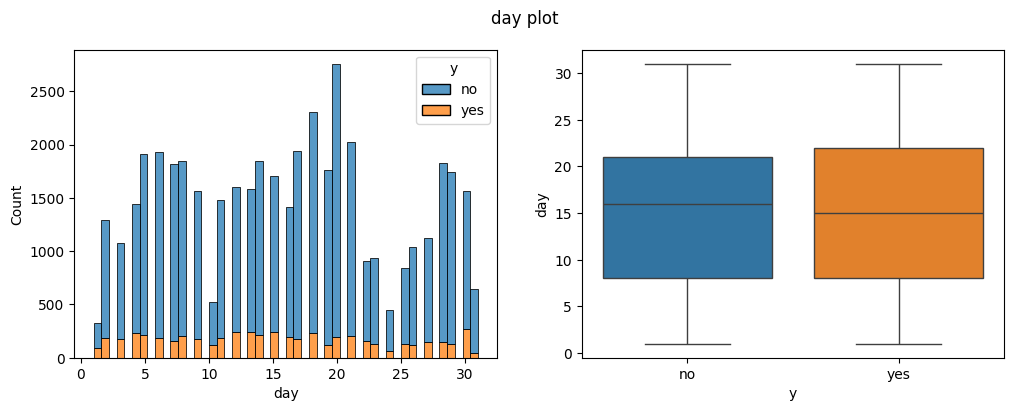

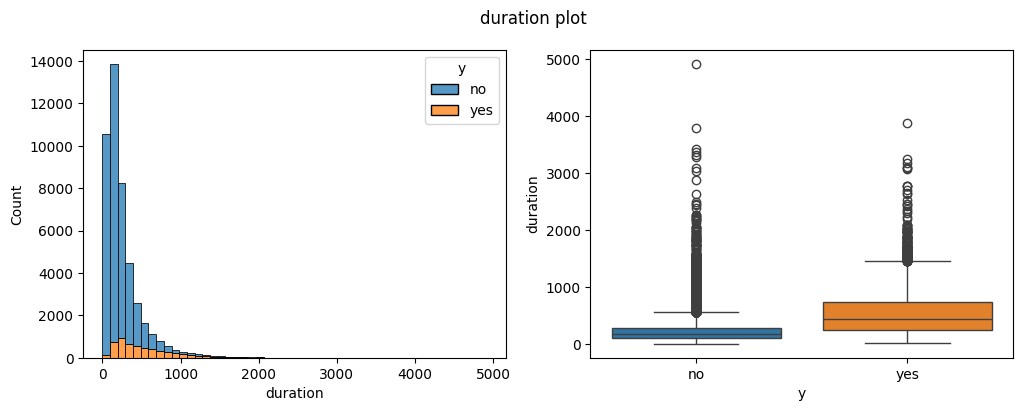

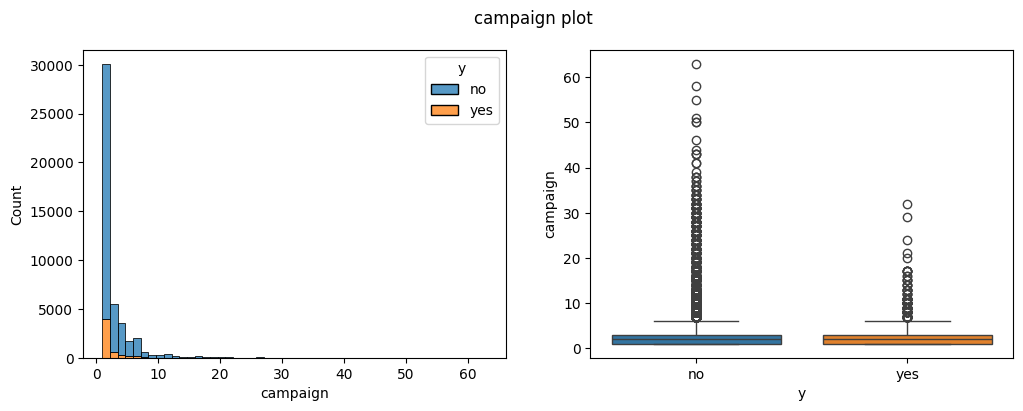

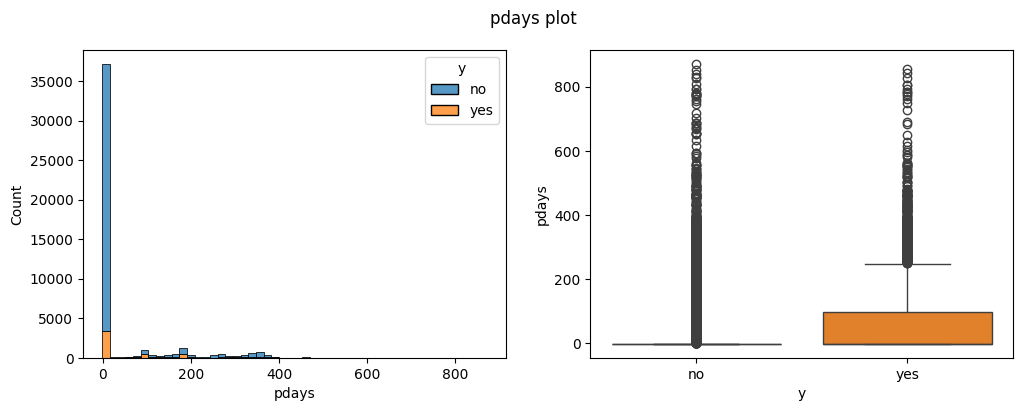

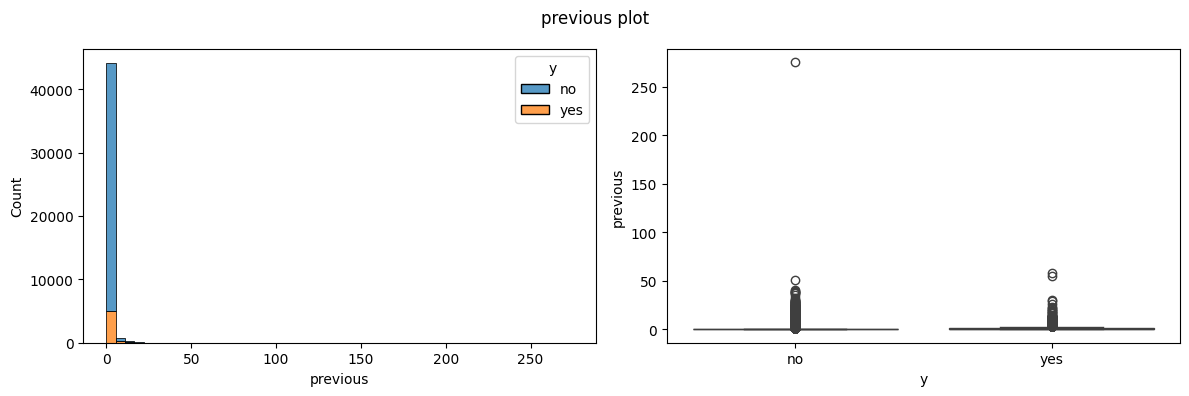

In [15]:
numerical_feature = df.select_dtypes(include = [np.number]).columns.tolist()

for pos, i in enumerate(numerical_feature):
    fig, ax = plt.subplots(1,2, figsize = (12,4))
    sns.histplot(df, x = i, stat = 'count', multiple = 'stack', hue = 'y', ax = ax[0], bins = 50)
    sns.boxplot(df, y= i, x = 'y', hue = 'y', ax = ax[1])
    plt.suptitle(f'{i} plot')
    
plt.tight_layout()
plt.show()

## Comment
The 'yes' rate is very low, it's from 10-15%

Age focuses on 30 to 47 years old.

Day Most concentrated between days 5 and 2

Balance focuses from 0 to under 3000

Day focuses from the 8th to the 22nd

Duration ranges from 100 to 400 days

campaign contract number is distributed between 1 and 2

pday/previous focuses mainly on about 1 day

## 3.3. Categorical Feature

In [16]:
categorical_feature = df.select_dtypes(include = [object]).columns.tolist()
categorical_feature.remove('y')

In [17]:
l = len(categorical_feature)/2 + 0.5
l = int(l)

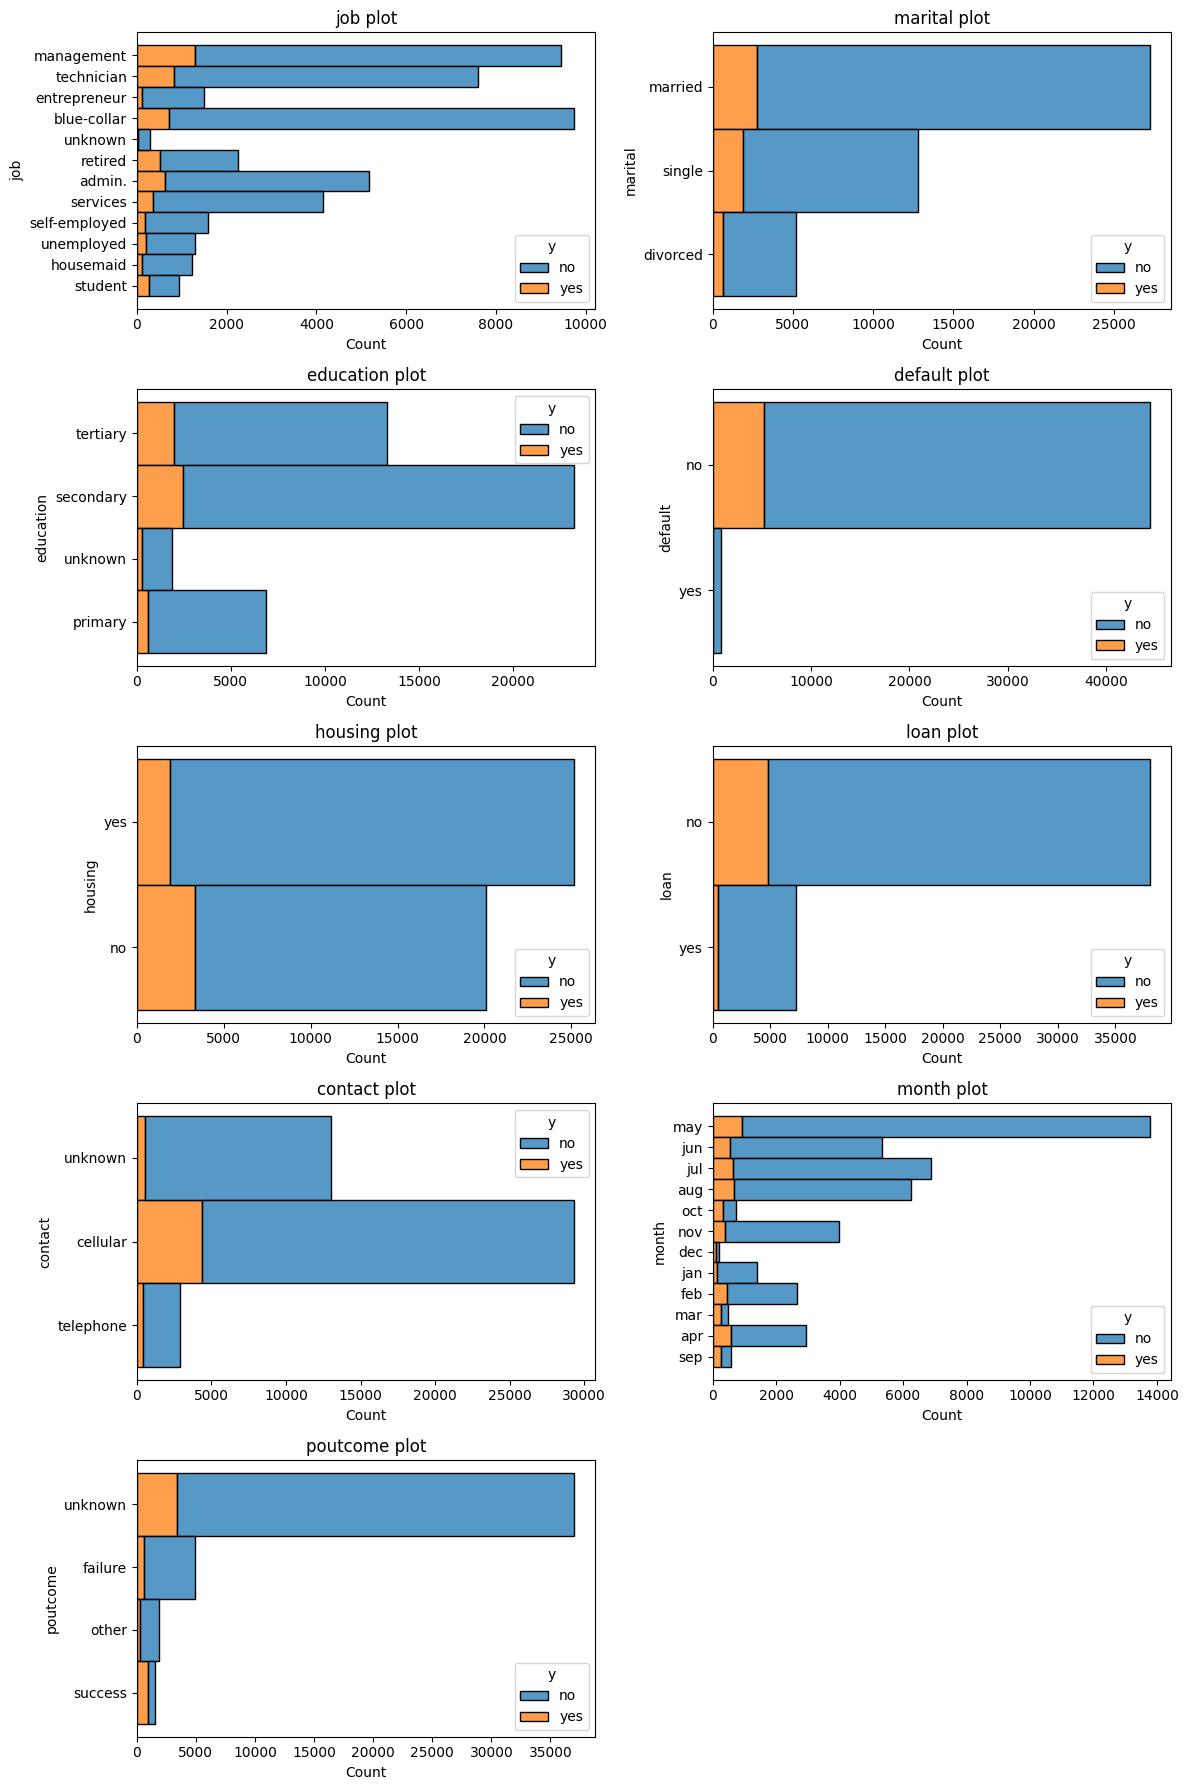

In [18]:

fig, ax = plt.subplots(l,2, figsize = (12,18))
for pos, i in enumerate(categorical_feature):
    sns.histplot(df, y = i, stat = 'count', multiple = 'stack', hue = 'y', ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].set_title(f'{i} plot')
for pos in range(int(len(categorical_feature)), l*2):
    fig.delaxes(ax[pos//2, pos%2])
plt.tight_layout()
plt.show()

### comment : 
job : Người tham gia chủ yếu là manager, technician, blue collar.
    
martial : Người tham gia phần lớn là đã kết hôn, những người đã li dị chiếm tỉ lệ thấp

Education : Người tham gia nhiều nhất là secondary, sau đó đến tertiary

Những người có tài khoản mới(mặc định) chiếm số ít. còn lại chủ yếu là những người đã từng tham gia

housing : không có sự khác biệt nhiều giữa số lượng người tham gia : có nhà và k có nhà

loan : chủ yếu những người tham gia là người không có khoản vay

contact chủ yếu qua cellular và các thiết bị khác

tháng nhiều người tham gia nhất là tháng 5, các tháng thứ 2 là 6 7 8. Tháng 12 3 9 có số người tham gia ít

Poutcome: Kết quả của chiến dịch trước đó tập trung vào mục 'không xác định'




## 3.4. Correlation of numerical and categorical to target

In [19]:
le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df['y'] = le.fit_transform(df['y'])

<Axes: >

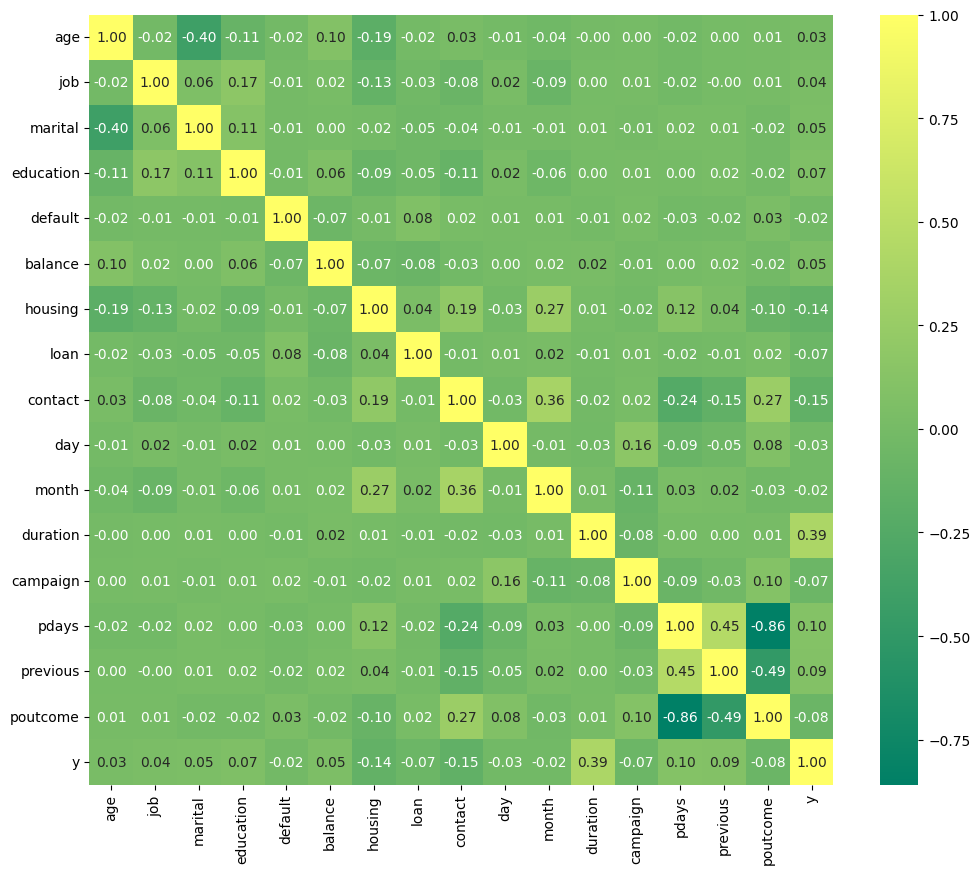

In [20]:
df_cor = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(df_cor, cmap = 'summer', fmt = '.2f', annot = True)

### The features that are correlated with y are:
duration : Duration of the last communication

The longer the contact duration, shows that the customer is interested and interested in the bank's marketing program.

For customers who have previously participated, they will need more information or want to know about the profits that the new program will bring.

contact : contact type

These types of communication are the means for customers to receive marketing information. The more convenient it is, the more customers it will reach.

housing: whether the customer is taking out a mortgage loan or not.

There are two factors that affect the campaign: whether this person has a mortgage or not. If we do not borrow, we can predict that this person already

has a house and is economically stable, or has no intention of buying a house, so he is looking to increase other income. So we approached this campaign

.Second, for people with mortgages, they have more concerns at this time, so they probably won't pay too much attention to the campaign. A few of them 

wanted to participate for some other purpose

pdays: number of days since the last contact of the bank.

It can be said that when the campaign started, most of those who were really interested had signed up to participate, or had contacted to find out while

the marketing campaign was happening. People outside this range mostly have no need or this campaign is not suitable for them

# IV. Fearure Selection

In [21]:
x = df.drop(columns = 'y')
y = df['y']
# 0 mean no and 1 mean yes

In [22]:
scaled = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[numerical_feature] = scaled.fit_transform(x_train_scaled[numerical_feature])
x_test_scaled[numerical_feature] = scaled.transform(x_test_scaled[numerical_feature])

In [23]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state = 42)
    ,'DecisionTree': DecisionTreeClassifier(random_state = 42)
    , 'LogisticRegression' : LogisticRegression(random_state = 42)
    ,'KNeighbors' : KNeighborsClassifier()
}

In [24]:
accuracy_df = pd.DataFrame()
f1_df = pd.DataFrame()
for name, model in classifiers.items():
    print(f'Training {name}......')
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'F1 score is: {f1}')
    print(f'Accuracy score is {accuracy}')
    print(classification_report(y_test, y_pred))
    accuracy_ = pd.DataFrame({'name': [name], 'accuracy':[accuracy]})
    f1_ = pd.DataFrame({'name':[name], 'f1_score': [f1]})
    accuracy_df = pd.concat([accuracy_df, accuracy_], ignore_index = True)
    f1_df = pd.concat([f1_df, f1_], ignore_index = True)
    

Training RandomForest......
F1 score is: 0.4991643454038997
Accuracy score is 0.9005860886873825
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

Training DecisionTree......
F1 score is: 0.4794520547945205
Accuracy score is 0.8739356408271591
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Training LogisticRegression......
F1 score is: 0.2839160839160839
Accuracy score is 0.8867632422868517
              precision    recall  f1-score   sup

In [25]:
#f1 score seems to be low
#We need to check if it overfitting or underfitting
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_scaled, y_train)
train_score = model.score(x_train_scaled, y_train)
test_score = model.score(x_test_scaled, y_test)

print(f'Train Accuracy: {train_score}')
print(f'Test Accuracy: {test_score}')

Train Accuracy: 1.0
Test Accuracy: 0.8739356408271591


In [26]:
# Model is overfitting. 
#So we will use cross validation

In [27]:
skfold = StratifiedKFold(n_splits = 5)
for name, model in classifiers.items():
    print(f'training {name}....')
    scores = cross_val_score(model, x_train_scaled, y_train, cv = skfold)
    score = np.mean(scores)
    print(f'{name}: {score}')

training RandomForest....
RandomForest: 0.9050541972308362
training DecisionTree....
DecisionTree: 0.8748063977803329
training LogisticRegression....
LogisticRegression: 0.8913681880971239
training KNeighbors....
KNeighbors: 0.8901239446381306


In [28]:
#We will choose RandomForest, Logistic Regression for building

In [29]:
#Model building
model_params = {
    'random_forest' : {
        'model' : RandomForestClassifier()
        ,'params' : {
            'n_estimators' : [100,200,300, 500] #số cây
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto', max_iter = 300) #
         ,'params' : {
            'C' : [1,5,10] #Tham số điều chuẩn
            
        }
    },

}
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(x_train_scaled, y_train)
    scores.append({
        'model' : model_name,
        'best_score':clf.best_score_,
        'best_params' : clf.best_params_
    })
dff = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
dff


,model,best_score,best_params
0,random_forest,0.905994,{'n_estimators': 500}
1,logistic_regression,0.892142,{'C': 10}


In [30]:
classifier_ ={
    'LogisticRegression': LogisticRegression(C = 10, random_state = 42)
    ,'RandomForest' : RandomForestClassifier(n_estimators = 300, random_state = 42)
    ,'DecisionTree' : DecisionTreeClassifier()
    ,'KNN' : KNeighborsClassifier()
}

accuracy_df = pd.DataFrame()
f1_df = pd.DataFrame()
for name, model in classifier_.items():
    print(f'Training {name}......')
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'F1 score is: {f1}')
    print(f'Accuracy score is {accuracy}')
    print(classification_report(y_test, y_pred))
    accuracy_ = pd.DataFrame({'name': [name], 'accuracy':[accuracy]})
    f1_ = pd.DataFrame({'name':[name], 'f1_score': [f1]})
    accuracy_df = pd.concat([accuracy_df, accuracy_], ignore_index = True)
    f1_df = pd.concat([f1_df, f1_], ignore_index = True)

Training LogisticRegression......
F1 score is: 0.32133333333333336
Accuracy score is 0.8874267389140772
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043

Training RandomForest......
F1 score is: 0.5088888888888888
Accuracy score is 0.9022448302554462
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.65      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043

Training DecisionTree......
F1 score is: 0.4750227066303361
Accuracy score is 0.8721663164878912
              precision    recall  f1-score   su

In [31]:
#Seem like we need to use smote, resample to solve this

In [32]:
smote = SMOTE(random_state = 42)
x_train_resample, y_train_resample = smote.fit_resample(x_train_scaled, y_train)

In [33]:
accuracy_df = pd.DataFrame()
f1_score_df = pd.DataFrame()
for name, model in classifiers.items():
    print(f'{name}.....')
    model.fit(x_train_resample, y_train_resample)
    y_pred = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Accuracy Score : {accuracy}')
    print(f'F1_score : {f1}')
    print(classification_report(y_test, y_pred))
    
    A_score = pd.DataFrame({'name': [name], 'score' : [accuracy]}) 
    accuracy_df = pd.concat([accuracy_df, A_score], ignore_index = True)
    
    F_score = pd.DataFrame({'name': [name], 'score': [f1]})
    f1_score_df  = pd.concat([f1_score_df, F_score], ignore_index = True)

    print(confusion_matrix(y_test, y_pred))

RandomForest.....
Accuracy Score : 0.8826716797522945
F1_score : 0.5788011115522033
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7952
           1       0.51      0.67      0.58      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.79      0.76      9043
weighted avg       0.90      0.88      0.89      9043

[[7253  699]
 [ 362  729]]
DecisionTree.....
Accuracy Score : 0.852814331527148
F1_score : 0.47946812671098943
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7952
           1       0.42      0.56      0.48      1091

    accuracy                           0.85      9043
   macro avg       0.68      0.73      0.70      9043
weighted avg       0.87      0.85      0.86      9043

[[7099  853]
 [ 478  613]]
LogisticRegression.....
Accuracy Score : 0.8113457923255557
F1_score : 0.4997067448680352
              precision    recall 

In [ ]:
model_params = {
    'RandomForest' : {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [300,600,900],        # Số lượng cây tối đa
            'max_depth': np.random.randint(3, 20, size = 5).tolist(),                # Độ sâu tối đa của các cây
            'min_samples_split': np.random.randint(2, 20, size = 5).tolist(),        # Số mẫu tối thiểu để chia
            'min_samples_leaf': np.random.randint(1, 20, size = 5).tolist(),         # Số mẫu tối thiểu trên mỗi lá
            'max_features': ['sqrt', 'log2', None]      # Số lượng đặc trưng tối đa để xem xét
        }
    }
}
score = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score = False )
    clf.fit(x_train_resample, y_train_resample)
    score.append({
        'model':model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
dff = pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])

In [ ]:
dff

In [35]:
model = RandomForestClassifier(random_state = 42, max_depth = 16, max_features = 'log2', min_samples_leaf = 9, min_samples_split = 3, n_estimators = 200)
model.fit(x_train_resample, y_train_resample)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
print(f'Accuracy Score : {accuracy}')
print(f'F1_score : {f1}')

Accuracy Score : 0.8677430056397213
F1_score : 0.5847222222222223


In [36]:
model = RandomForestClassifier(n_estimators = 600, random_state = 42)
model.fit(x_train_resample, y_train_resample)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
print(f'Accuracy Score : {accuracy}')
print(f'F1_score : {f1}')

Accuracy Score : 0.884662169633971
F1_score : 0.5872576177285319


In [37]:
model = RandomForestClassifier(random_state = 42, max_depth = 16, max_features = 'log2', min_samples_leaf = 9, min_samples_split = 3, n_estimators = 600)
model.fit(x_train_resample, y_train_resample)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
print(f'Accuracy Score : {accuracy}')
print(f'F1_score : {f1}')

Accuracy Score : 0.8660842640716576
F1_score : 0.581692573402418


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
